In [ ]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scripts.data_clean_utils import full_data_cleaning_pipeline
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
import nbformat

5.10.4


In [ ]:
BASE_DIR = Path().resolve().parent

DATA_PATH_DIR =  BASE_DIR / 'data' / 'raw' / 'Food Delivery Time Prediction Case Study.xlsx'

df = pd.read_excel(DATA_PATH_DIR, sheet_name="Sheet1")

In [ ]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [ ]:
df_final = full_data_cleaning_pipeline(df)

In [ ]:
df_final

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken,city_name,distance
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,INDO,3.025149
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,BANG,20.183530
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,BANG,1.552758
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,COIMB,7.790401
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,CHEN,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,JAP,1.489846
45589,AGRRES16DEL01,21,4.6,NaN,NaN,NaN,NaN,Buffet,motorcycle,36,AGR,NaN
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,CHEN,4.657195
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,COIMB,6.232393


In [ ]:
missing_values = (
    df_final
    .isnull()
    .any(axis=1)
    .sum()
)

print(f"Number of rows with missing values: {missing_values}")
print(f"it accounts for {missing_values / df_final.shape[0] * 100:.2f}% of the total rows.")

Number of rows with missing values: 3630
it accounts for 7.98% of the total rows.


In [ ]:
num_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df_final.select_dtypes(include=['object', 'category']).columns.tolist()  

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['age', 'ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude', 'time_taken', 'distance']
Categorical Columns: ['rider_id', 'type_of_order', 'type_of_vehicle', 'city_name']


In [ ]:
df_final[num_cols].describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,time_taken,distance
count,45502.000000,45502.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,41872.000000
mean,29.532394,4.633807,18.913696,76.921664,18.977356,76.985325,26.297591,9.719296
std,5.643948,0.307258,5.467265,3.503107,5.469056,3.503260,9.386419,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,10.000000,1.465067
25%,25.000000,4.600000,12.986047,73.897902,13.065996,73.940327,19.000000,4.657655
50%,29.000000,4.700000,19.065838,76.618203,19.124049,76.662620,26.000000,9.193014
75%,34.000000,4.800000,22.751234,78.368855,22.820040,78.405467,32.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,54.000000,20.969489


In [ ]:
(
    df_final
    .assign(**{
        col: df_final[col].astype('category') for col in cat_cols
        })
    .describe(include='category')
    .T
)

,count,unique,top,freq
rider_id,45502,1320,JAPRES11DEL02,67
type_of_order,45502,4,Snack,11512
type_of_vehicle,45502,4,motorcycle,26427
city_name,45502,22,JAP,3439


In [ ]:
import missingno as msno

<Axes: >

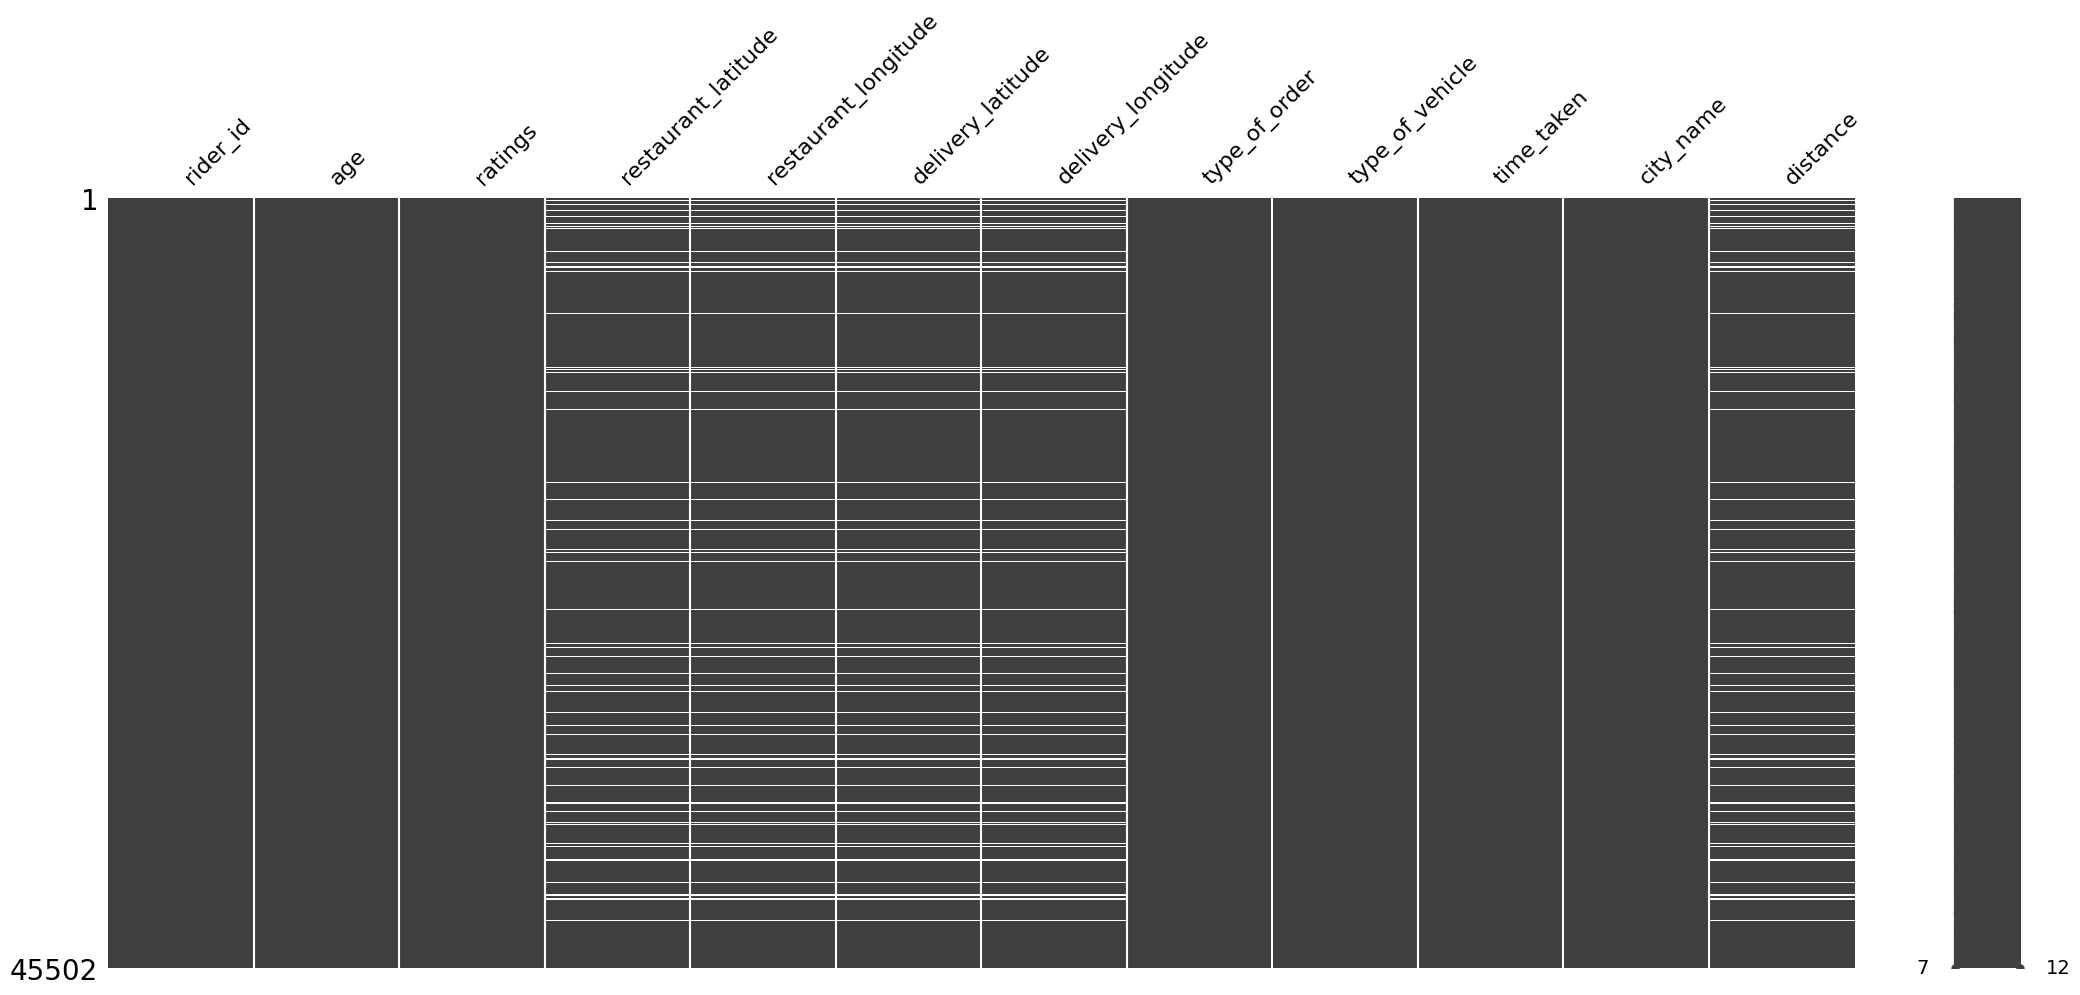

In [ ]:
msno.matrix(df_final)

<Axes: >

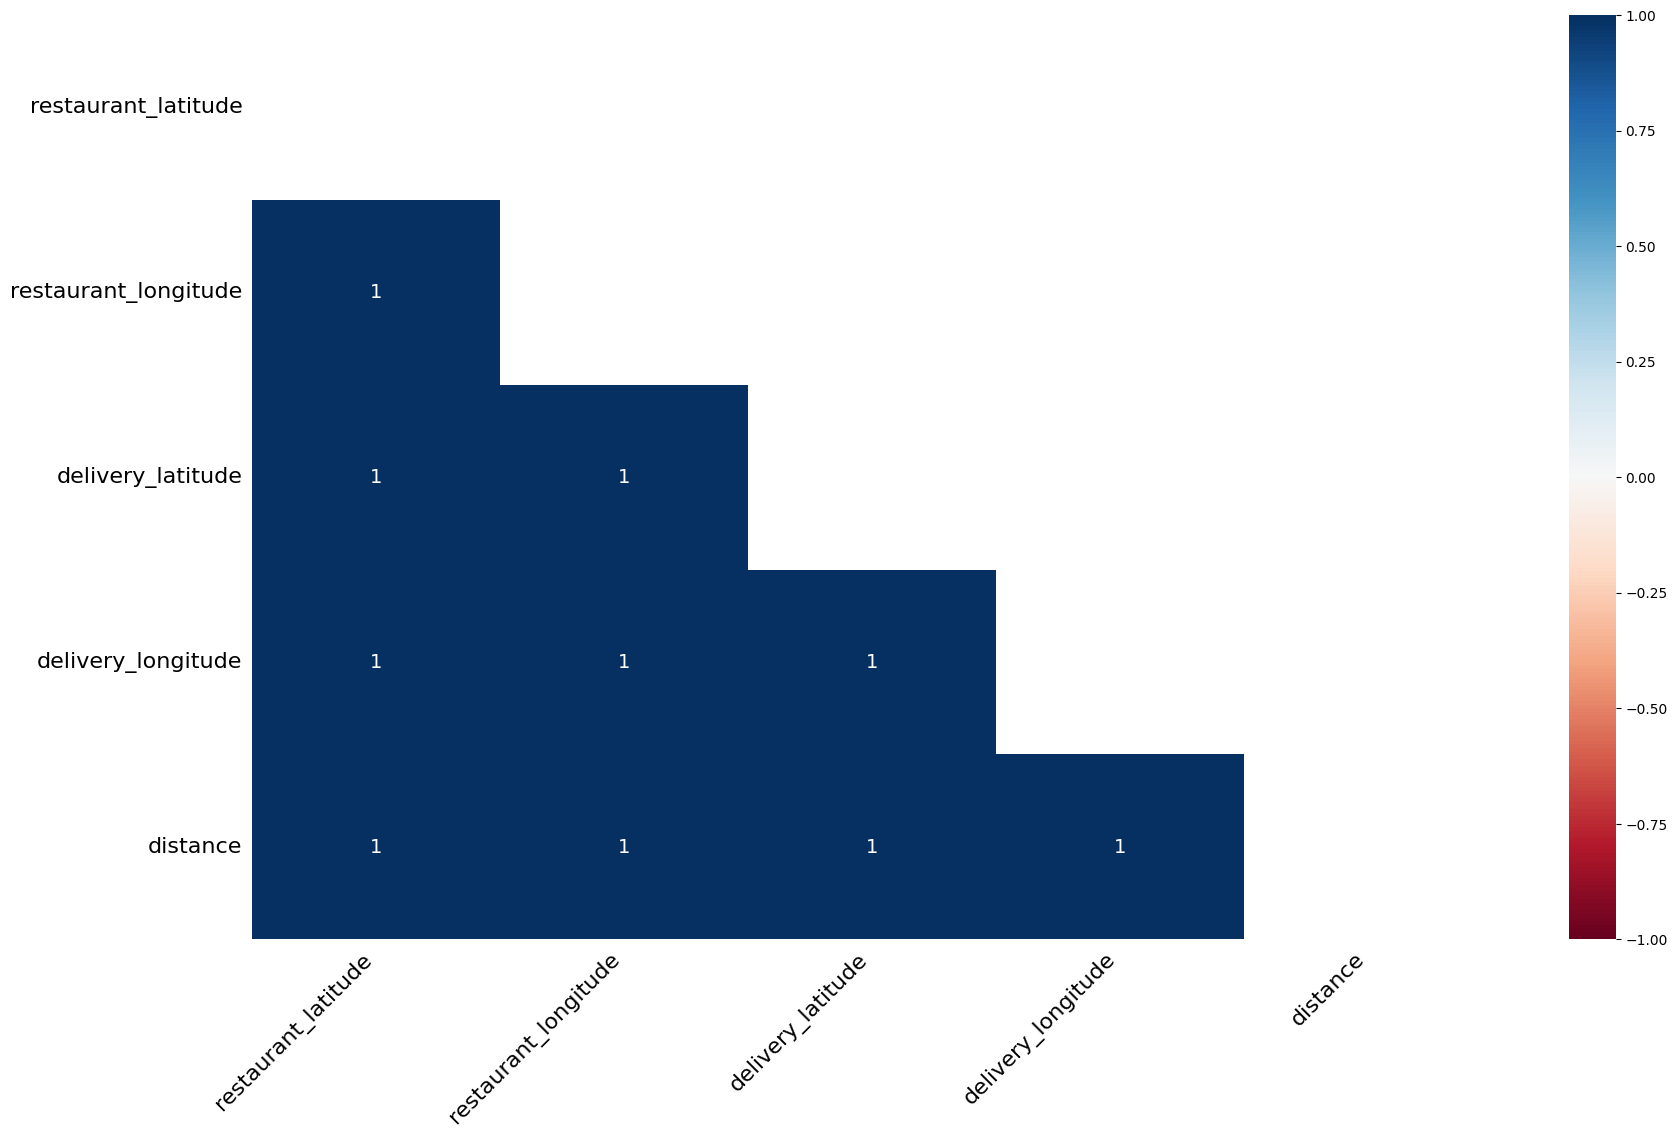

In [ ]:
msno.heatmap(df_final)

<Axes: >

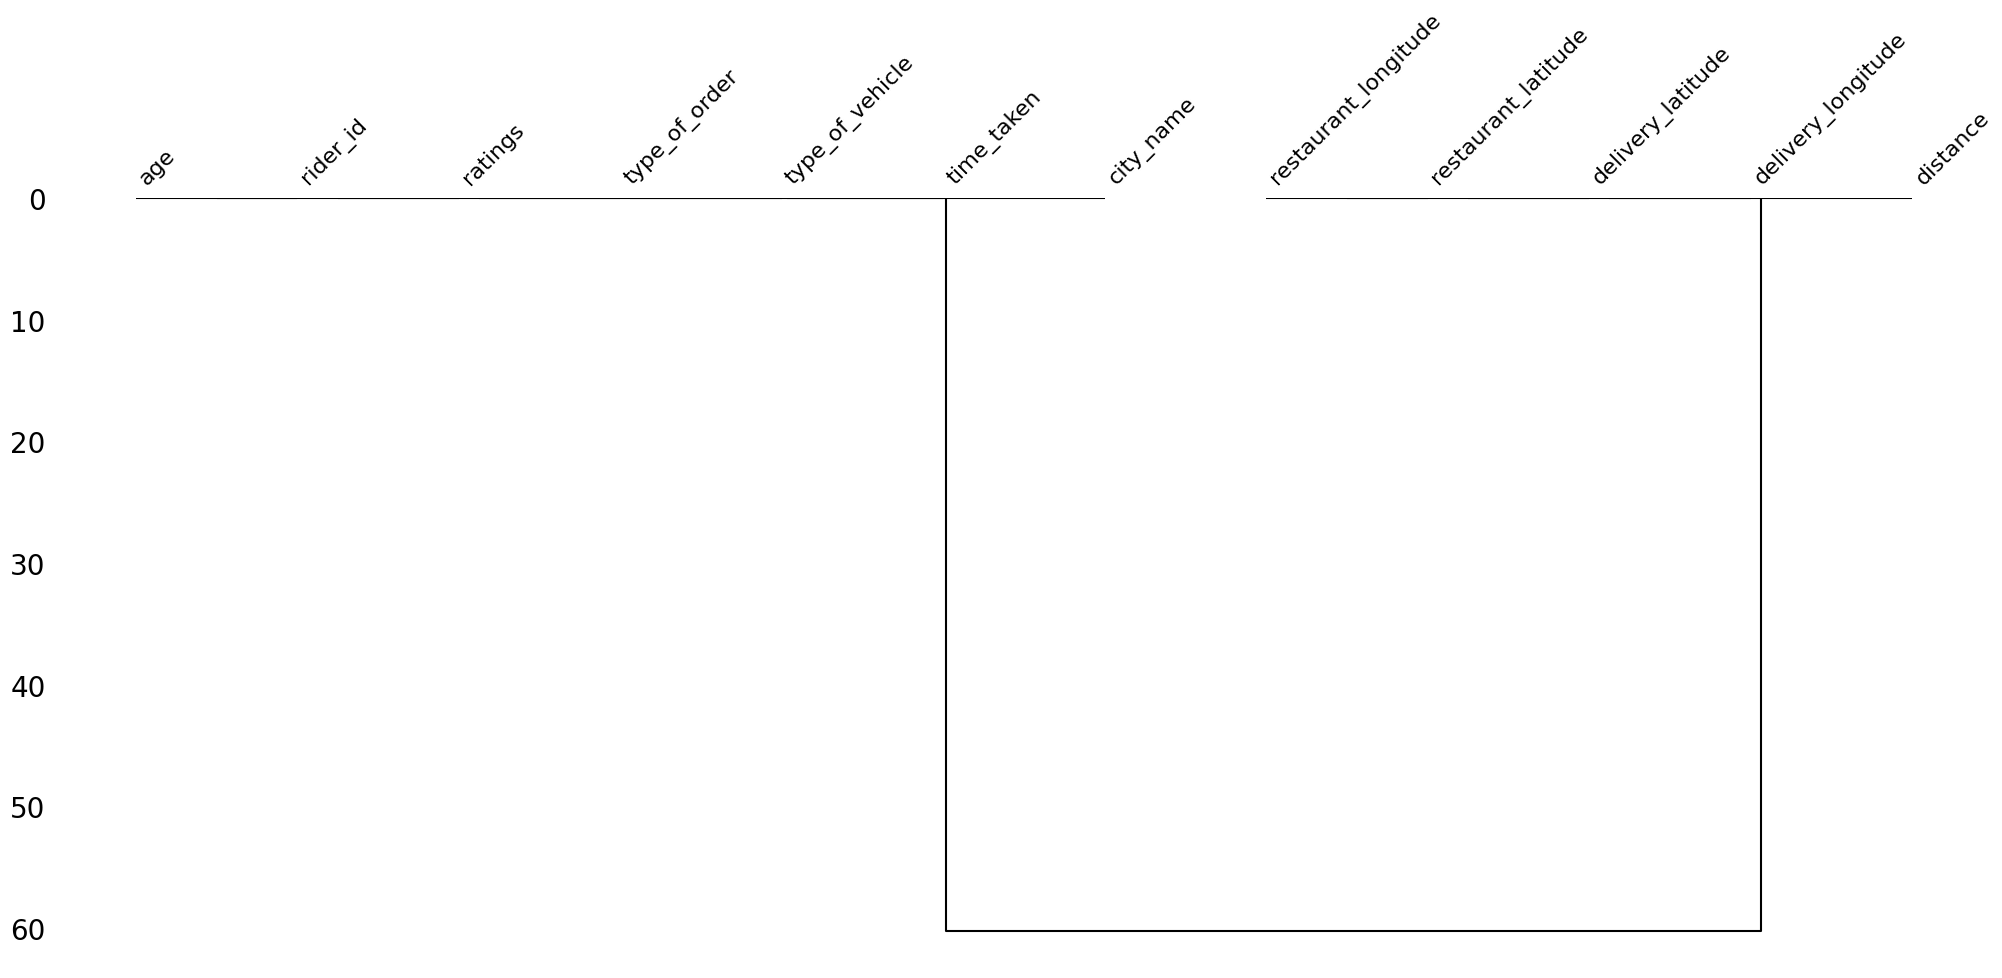

In [ ]:
msno.dendrogram(df_final)

Functions to perform analysis

In [ ]:
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()


def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()


def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")

     

Column Wise Analysis

In [ ]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'type_of_order', 'type_of_vehicle', 'time_taken', 'city_name',
       'distance'],
      dtype='object')

In [ ]:
# data type of column

df_final['time_taken'].dtype

dtype('int64')

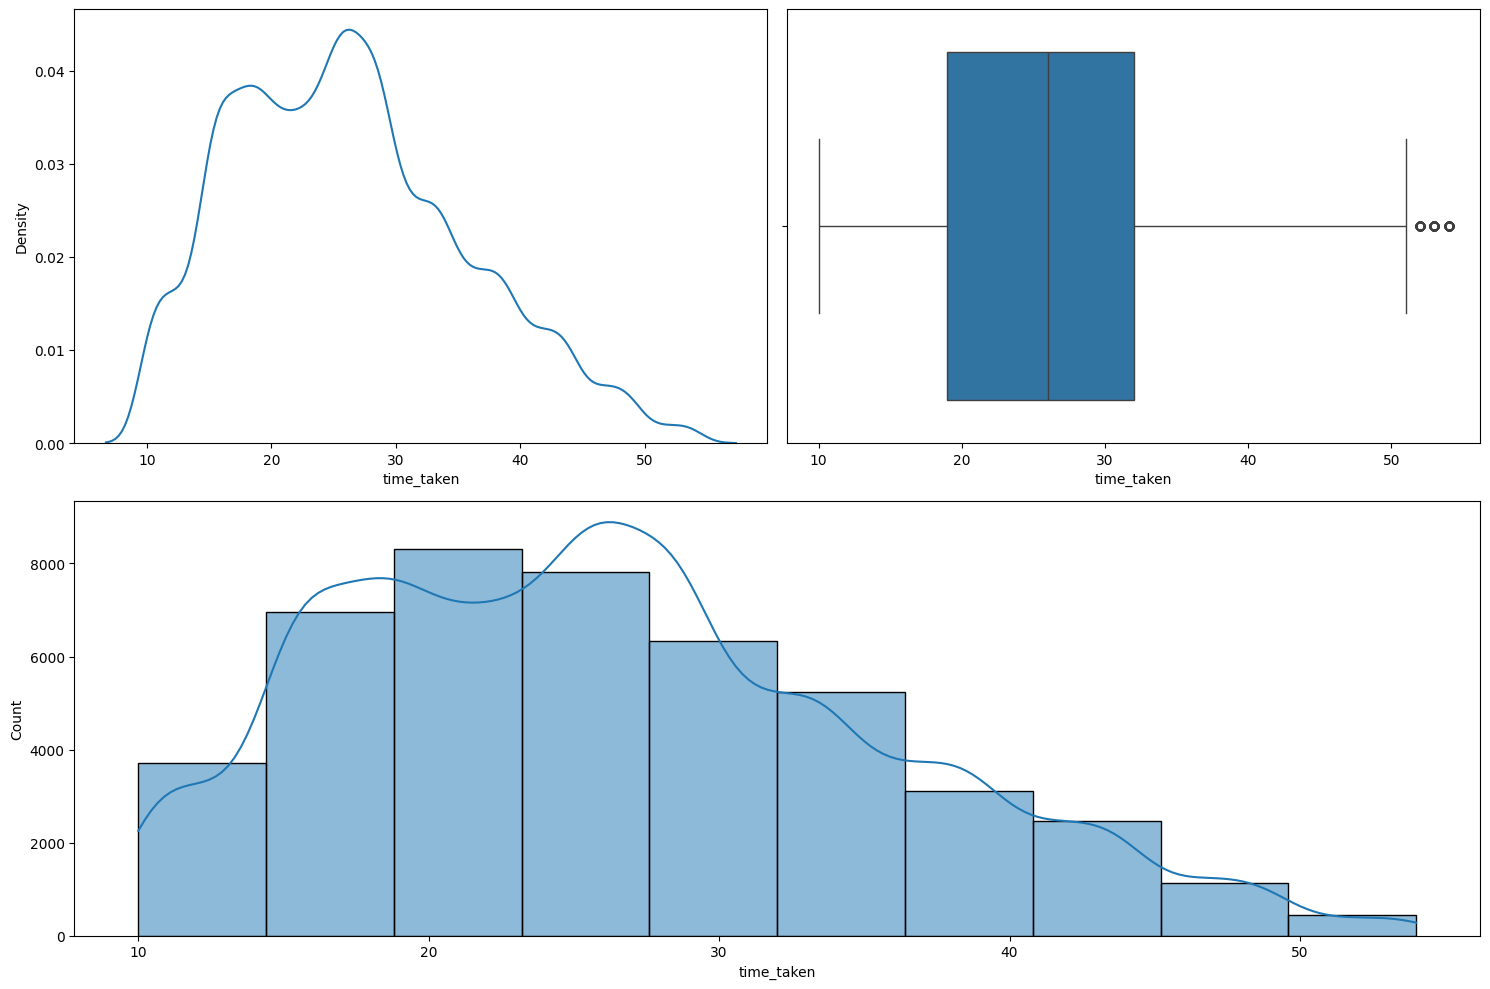

In [ ]:

# numerical analysis

numerical_analysis(df_final, 'time_taken',bins=10)

Observations:

1. The target column is not fully continuous in nature.
2. The target column shows dual modality with two peaks- One peak around the 17-18 mark and other around 26-27 mark.
3. The target column has some extreme points which can be thought of as outliers but they are just extreme and rare, not outliers. 50 min time is possible for delivery in certain rare cases.

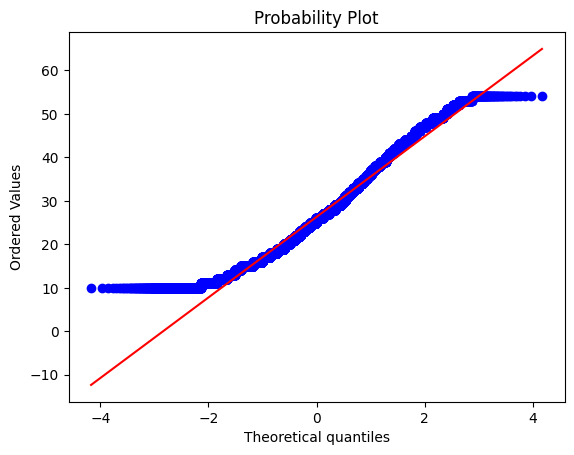

In [ ]:
# plot QQ plot for the target

probplot(df_final['time_taken'], plot=plt)
plt.show()

In [ ]:

# tests for normailty

test_for_normality(df_final, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [ ]:

# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df_final['time_taken'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

In [ ]:
# average distances
avg_distance = df_final.loc[:,"distance"].mean()
avg_distance_extreme = df_final.loc[(df_final['time_taken'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.719296323199579 13.29215081388658


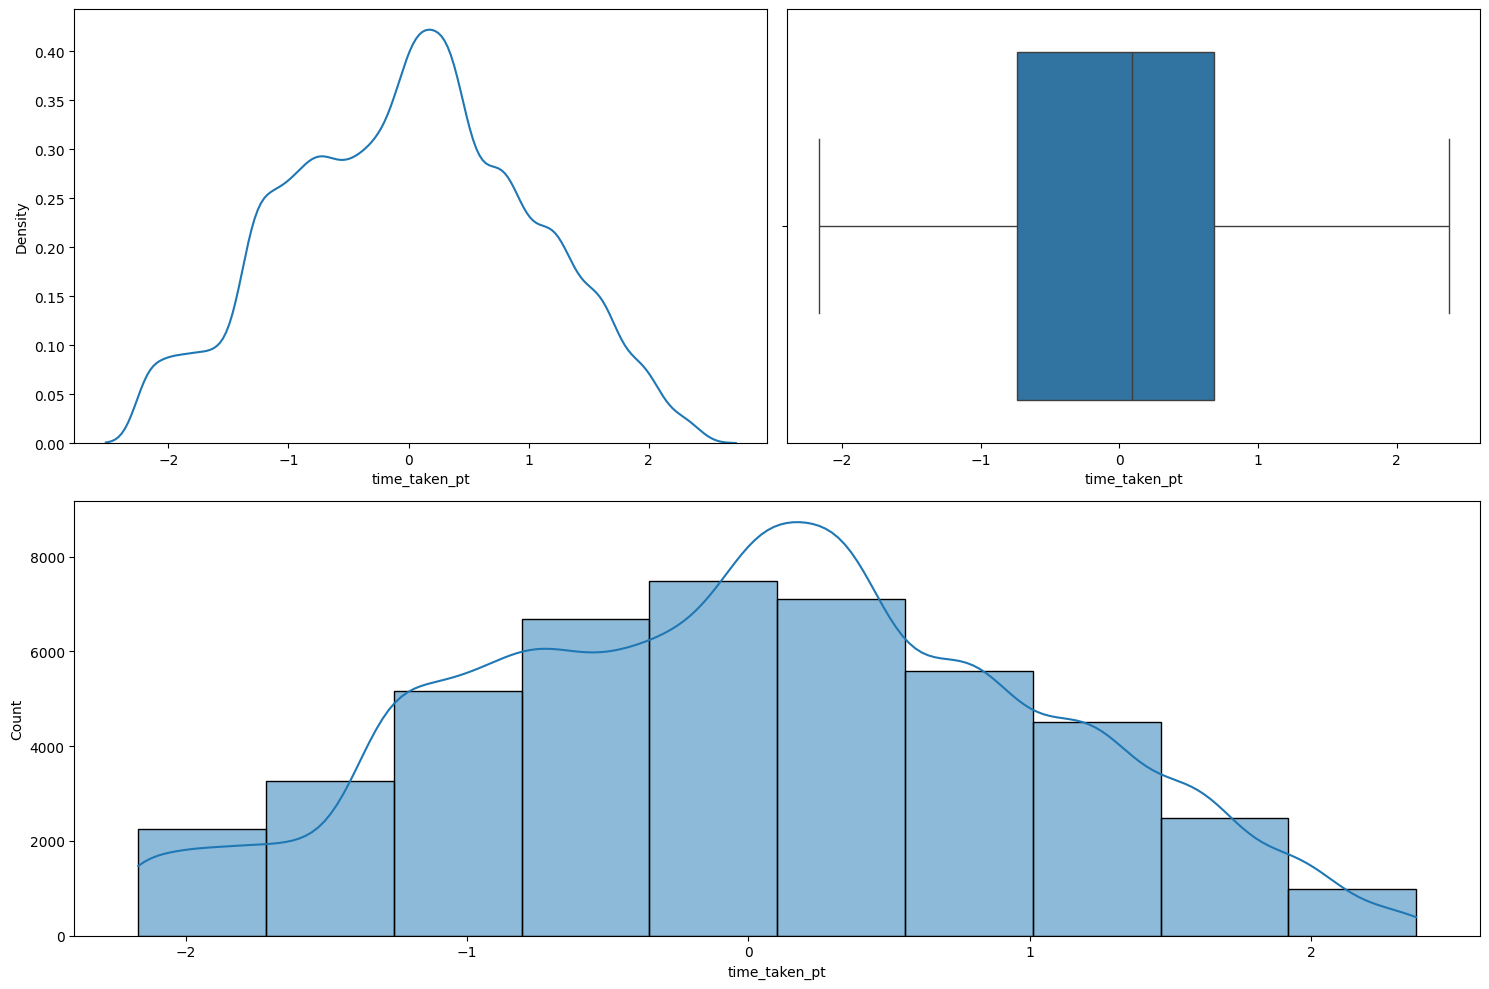

In [ ]:
# fix traget column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df_final['time_taken_pt'] = pt.fit_transform(df_final[['time_taken']])

numerical_analysis(df_final, "time_taken_pt", bins=10)

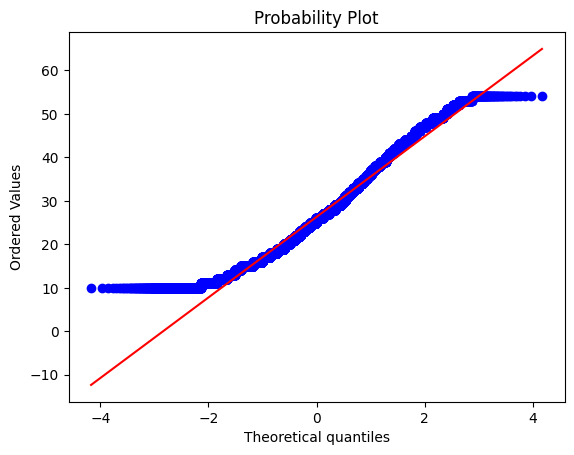

In [ ]:

probplot(df_final['time_taken'], plot=plt)
plt.show()

Rider_ID

In [ ]:
df_final['rider_id'].dtype

dtype('O')

In [ ]:
df_final[["rider_id","age","ratings"]]

,rider_id,age,ratings
0,INDORES13DEL02,37,4.9
1,BANGRES18DEL02,34,4.5
2,BANGRES19DEL01,23,4.4
3,COIMBRES13DEL02,38,4.7
4,CHENRES12DEL01,32,4.6
...,...,...,...
45588,JAPRES04DEL01,30,4.8
45589,AGRRES16DEL01,21,4.6
45590,CHENRES08DEL03,30,4.9
45591,COIMBRES11DEL01,20,4.7


In [ ]:
rider_id_group = df_final[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

,rider_id,age,ratings
92,AGRRES010DEL01,34,4.7
7750,AGRRES010DEL01,21,4.7
4558,AGRRES010DEL01,38,4.7
12437,AGRRES010DEL01,34,4.5
13244,AGRRES010DEL01,39,4.4
...,...,...,...
861,VADRES20DEL03,35,4.8
9807,VADRES20DEL03,30,4.6
9768,VADRES20DEL03,38,4.8
5099,VADRES20DEL03,35,4.9


In [ ]:
df_final[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

np.int64(11937)

In [ ]:
(
    df_final
    .loc[(df_final[["rider_id","age","ratings"]].duplicated(keep=False)),["rider_id","age","ratings"]]
    .dropna()
    .sort_values(["rider_id"])
)

,rider_id,age,ratings
800,AGRRES01DEL01,29,4.6
17210,AGRRES01DEL01,29,4.6
9728,AGRRES01DEL01,29,4.6
18566,AGRRES03DEL02,24,4.9
40368,AGRRES03DEL02,24,4.9
...,...,...,...
15943,VADRES20DEL03,29,4.6
26478,VADRES20DEL03,29,4.6
5099,VADRES20DEL03,35,4.9
21995,VADRES20DEL03,37,4.9


Not Useful for our analysis

# Age

In [ ]:
df_final['age'].dtype

dtype('int64')

In [ ]:
df_final['age'].describe()


count    45502.000000
mean        29.532394
std          5.643948
min         20.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         39.000000
Name: age, dtype: float64

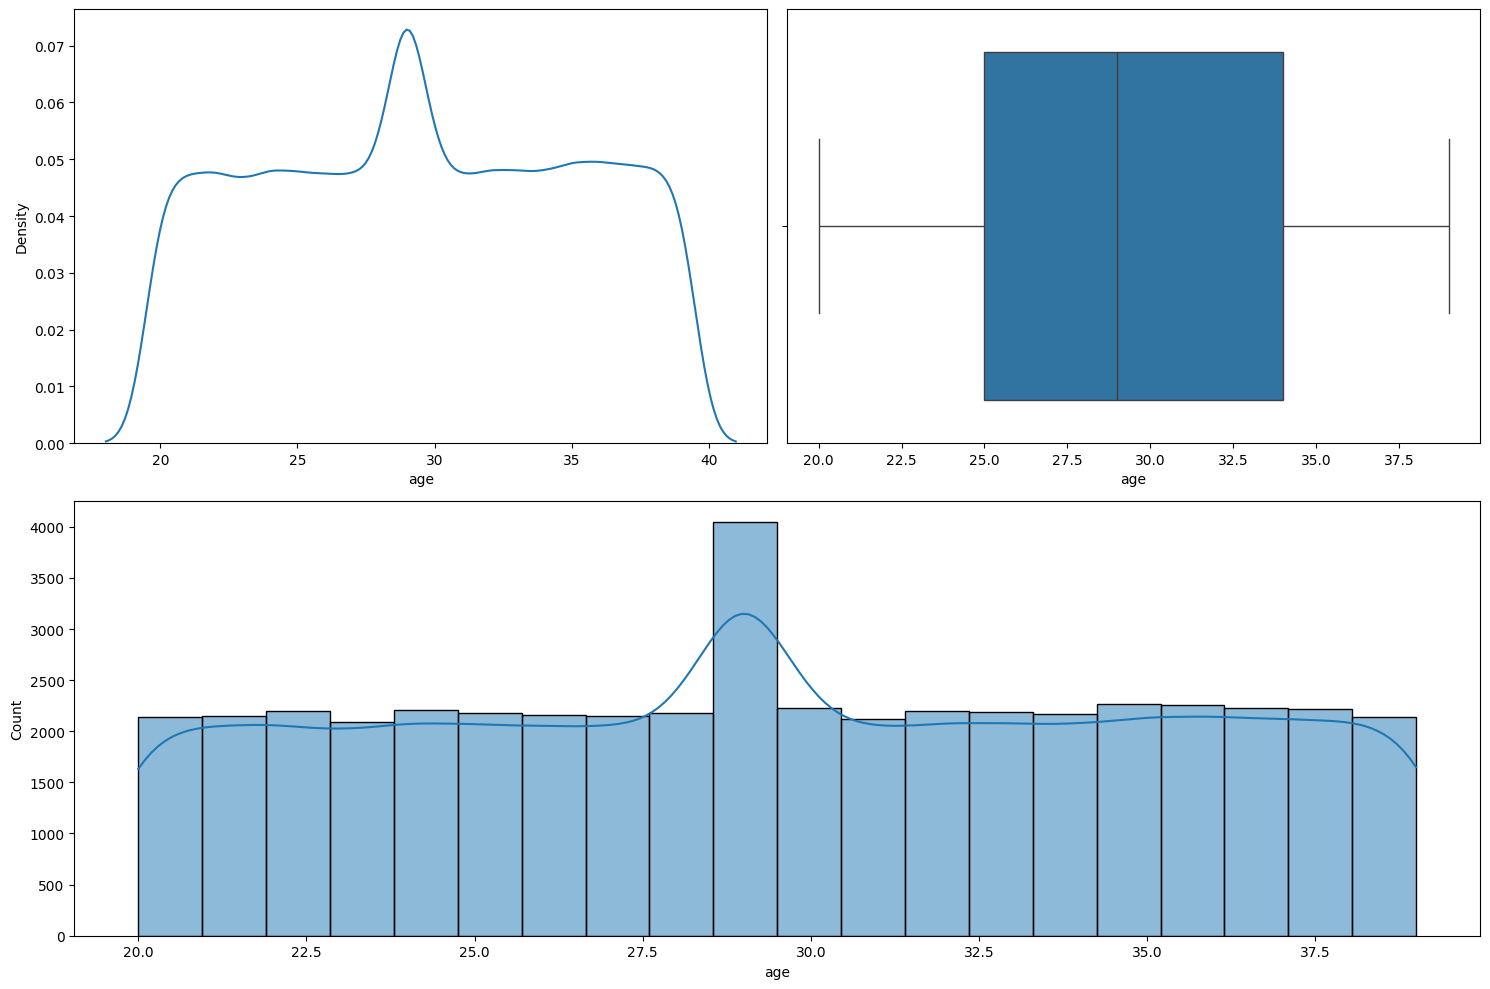

In [ ]:
numerical_analysis(df_final, 'age',bins=20)

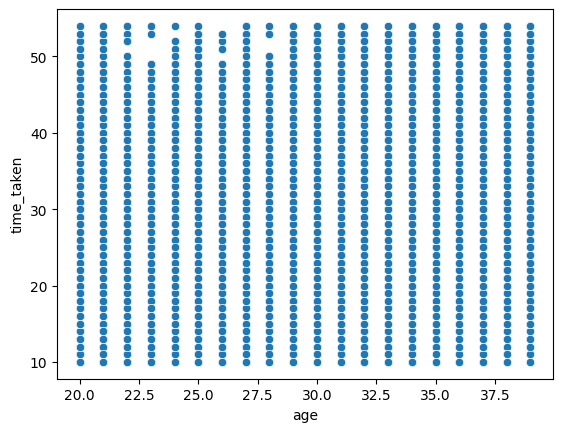

In [ ]:
sns.scatterplot(data=df_final, x='age', y='time_taken')
plt.show()

C:\Users\kunal\AppData\Local\Temp\ipykernel_29940\210995604.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.02, 1), loc=2)


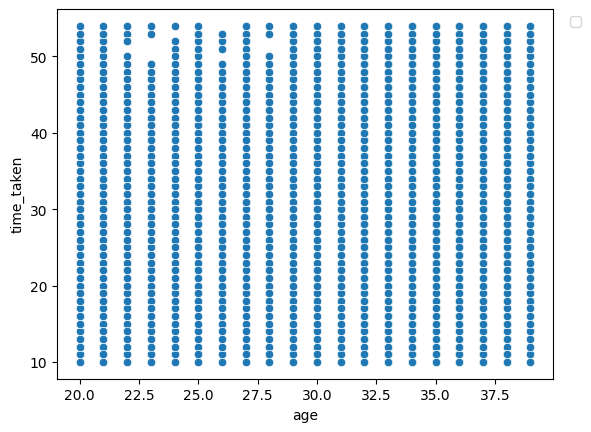

In [ ]:

sns.scatterplot(data=df_final, x='age', y='time_taken')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

# Ratings

In [ ]:
df_final['ratings'].dtype

dtype('float64')

In [ ]:
df_final['ratings'].describe()

count    45502.000000
mean         4.633807
std          0.307258
min          2.500000
25%          4.600000
50%          4.700000
75%          4.800000
max          5.000000
Name: ratings, dtype: float64

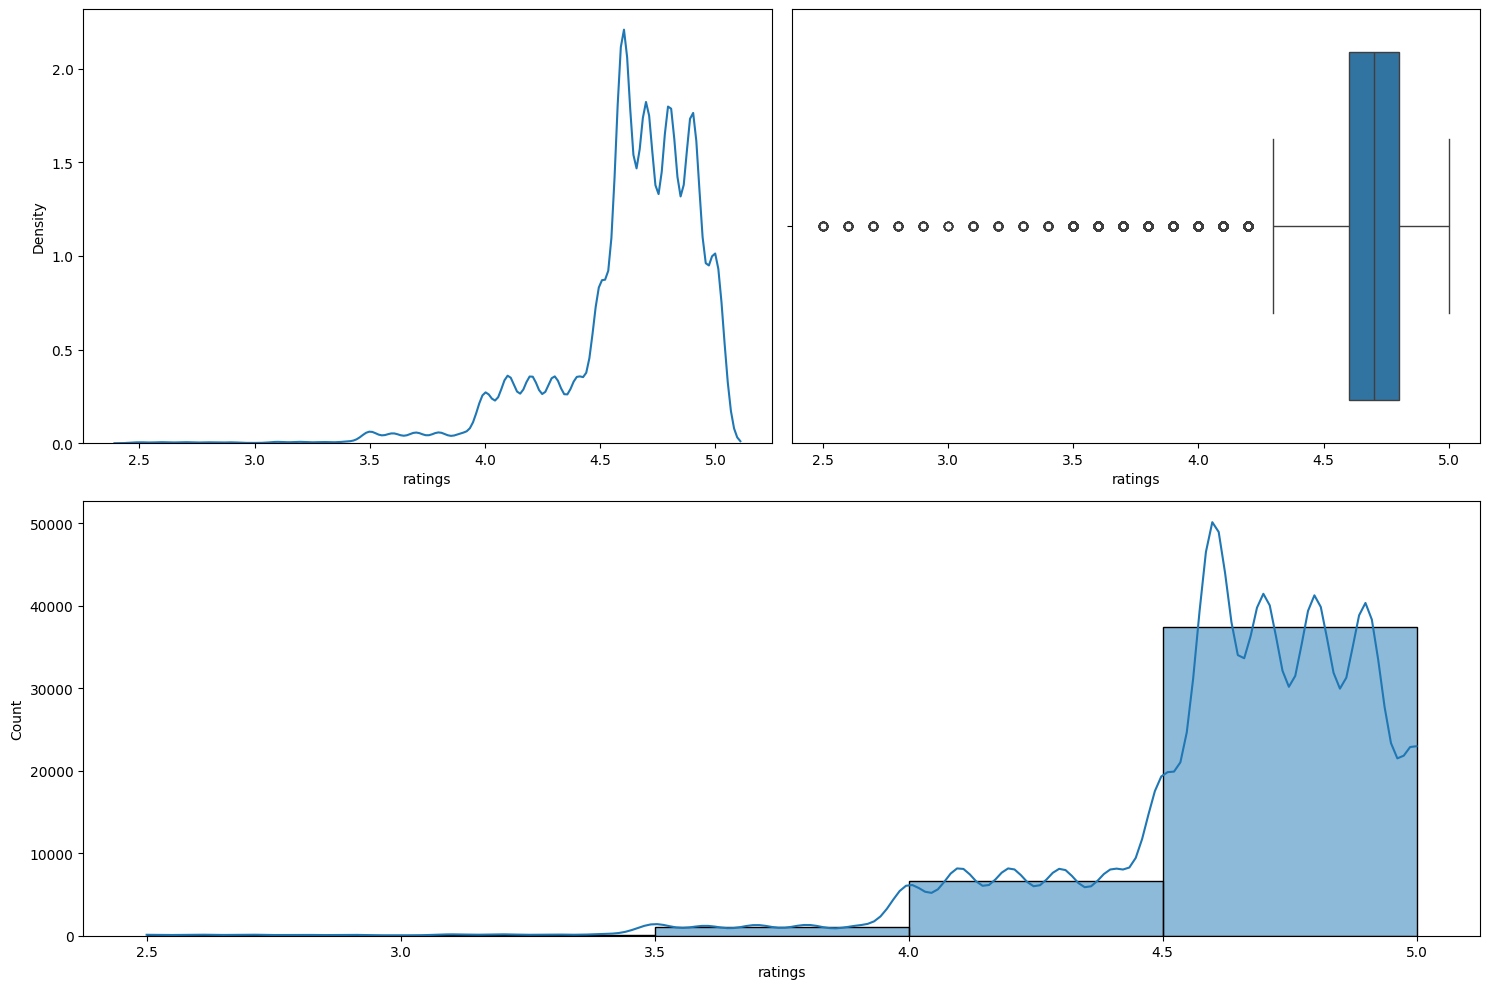

In [ ]:
numerical_analysis(df_final, 'ratings',bins=5)

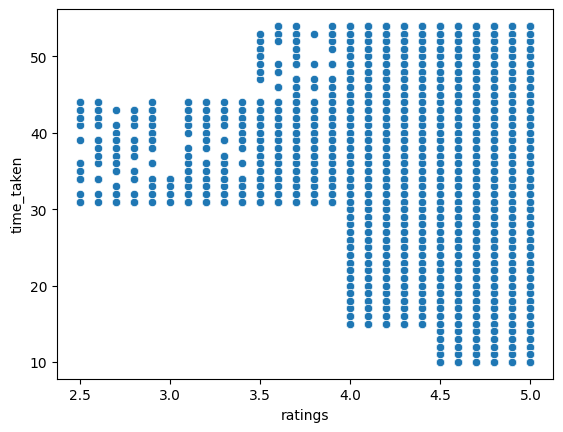

In [ ]:
sns.scatterplot(data=df_final, x='ratings', y='time_taken')
plt.show()

It seems like riders with more ratings get more orders

Higher ratings equates to more work and more income opportunities

In [ ]:
df_final.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

Location Based Features

In [ ]:

# location subset

location_subset = df_final.loc[:,df_final.columns[3:7].tolist() + ["city_name"]]

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,22.745049,75.892471,22.765049,75.912471,INDO
1,12.913041,77.683237,13.043041,77.813237,BANG
2,12.914264,77.678400,12.924264,77.688400,BANG
3,11.003669,76.976494,11.053669,77.026494,COIMB
4,12.972793,80.249982,13.012793,80.289982,CHEN
...,...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257,JAP
45589,NaN,NaN,NaN,NaN,AGR
45590,13.022394,80.242439,13.052394,80.272439,CHEN
45591,11.001753,76.986241,11.041753,77.026241,COIMB


In [ ]:
location_subset.dtypes

restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
city_name                object
dtype: object

In [ ]:
# drop missing values

location_subset.dropna(inplace=True)

location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,22.745049,75.892471,22.765049,75.912471,INDO
1,12.913041,77.683237,13.043041,77.813237,BANG
2,12.914264,77.678400,12.924264,77.688400,BANG
3,11.003669,76.976494,11.053669,77.026494,COIMB
4,12.972793,80.249982,13.012793,80.289982,CHEN
...,...,...,...,...,...
45587,23.371292,85.327872,23.481292,85.437872,RANCHI
45588,26.902328,75.794257,26.912328,75.804257,JAP
45590,13.022394,80.242439,13.052394,80.272439,CHEN
45591,11.001753,76.986241,11.041753,77.026241,COIMB


In [ ]:
delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    "city_name": location_subset["city_name"]
})


# Create a map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title="Delivery Points",
    hover_name="city_name"
)

# Update the layout for the map of India
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},  # Centered over India
    mapbox_zoom=3,
)

# Show the plot
fig.show()

C:\Users\kunal\AppData\Local\Temp\ipykernel_29940\2196943007.py:9: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
df_final.filter(like="order")

,type_of_order
0,Snack
1,Snack
2,Drinks
3,Buffet
4,Snack
...,...
45588,Meal
45589,Buffet
45590,Drinks
45591,Snack


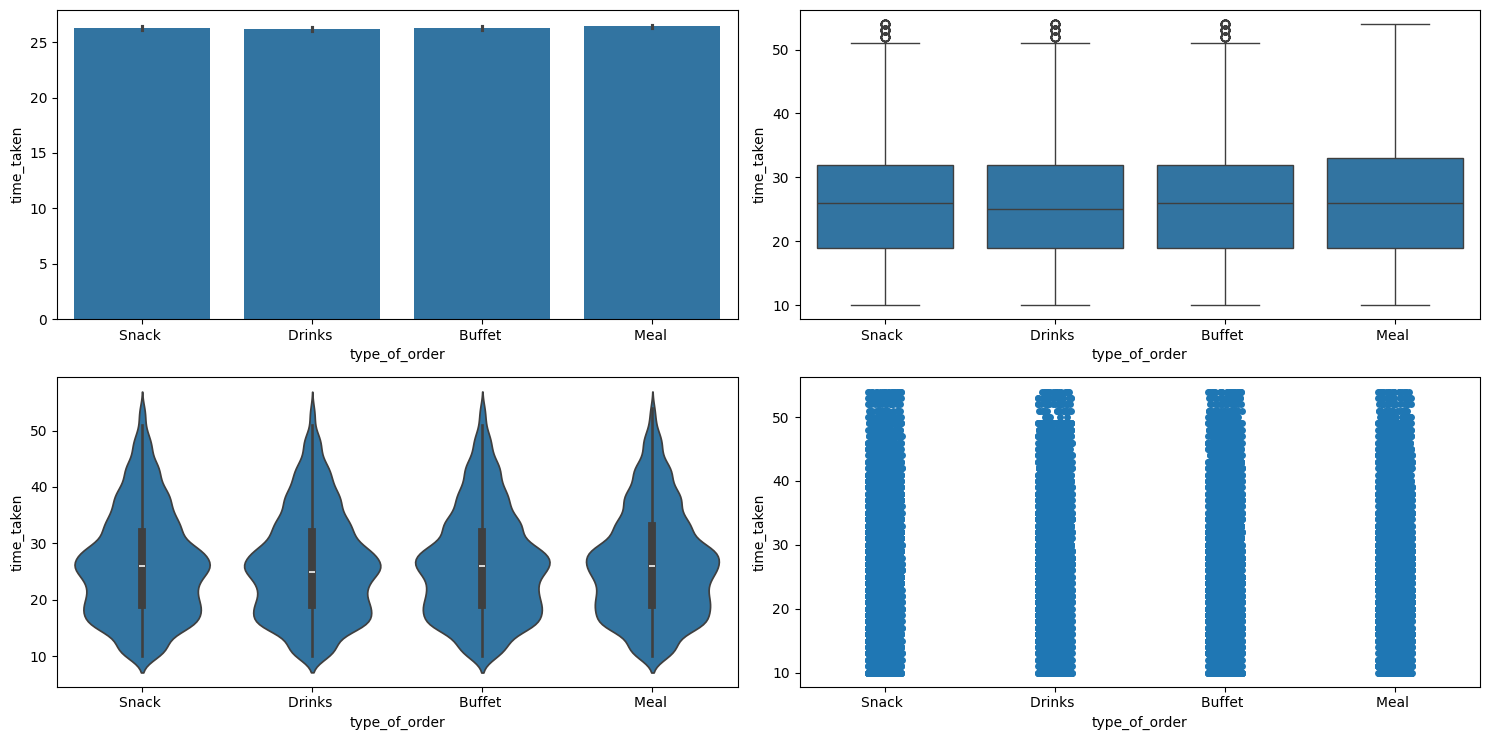

In [ ]:
numerical_categorical_analysis(df_final, "type_of_order", "time_taken")

In [ ]:
df_final

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,type_of_order,type_of_vehicle,time_taken,city_name,distance,time_taken_pt
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,INDO,3.025149,-0.130153
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,BANG,20.183530,0.775092
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,BANG,1.552758,0.088493
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,COIMB,7.790401,-0.482135
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,CHEN,6.210138,0.494134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,JAP,1.489846,0.683422
45589,AGRRES16DEL01,21,4.6,NaN,NaN,NaN,NaN,Buffet,motorcycle,36,AGR,NaN,1.039335
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,CHEN,4.657195,-1.151494
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,COIMB,6.232393,0.088493


Type of Order

In [ ]:
df_final['type_of_order'].dtype

dtype('O')

,Count,Percentage
type_of_order,,
Snack,11512,25.3%
Meal,11435,25.13%
Drinks,11294,24.82%
Buffet,11261,24.75%


**************************************************
The unique categories in type_of_order column are ['Snack ', 'Drinks ', 'Buffet ', 'Meal ']
**************************************************
The number of categories in type_of_order column are 4


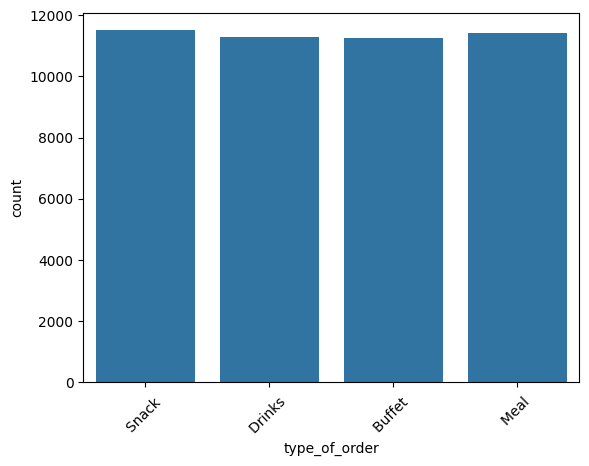

In [ ]:
categorical_analysis(df_final, "type_of_order")

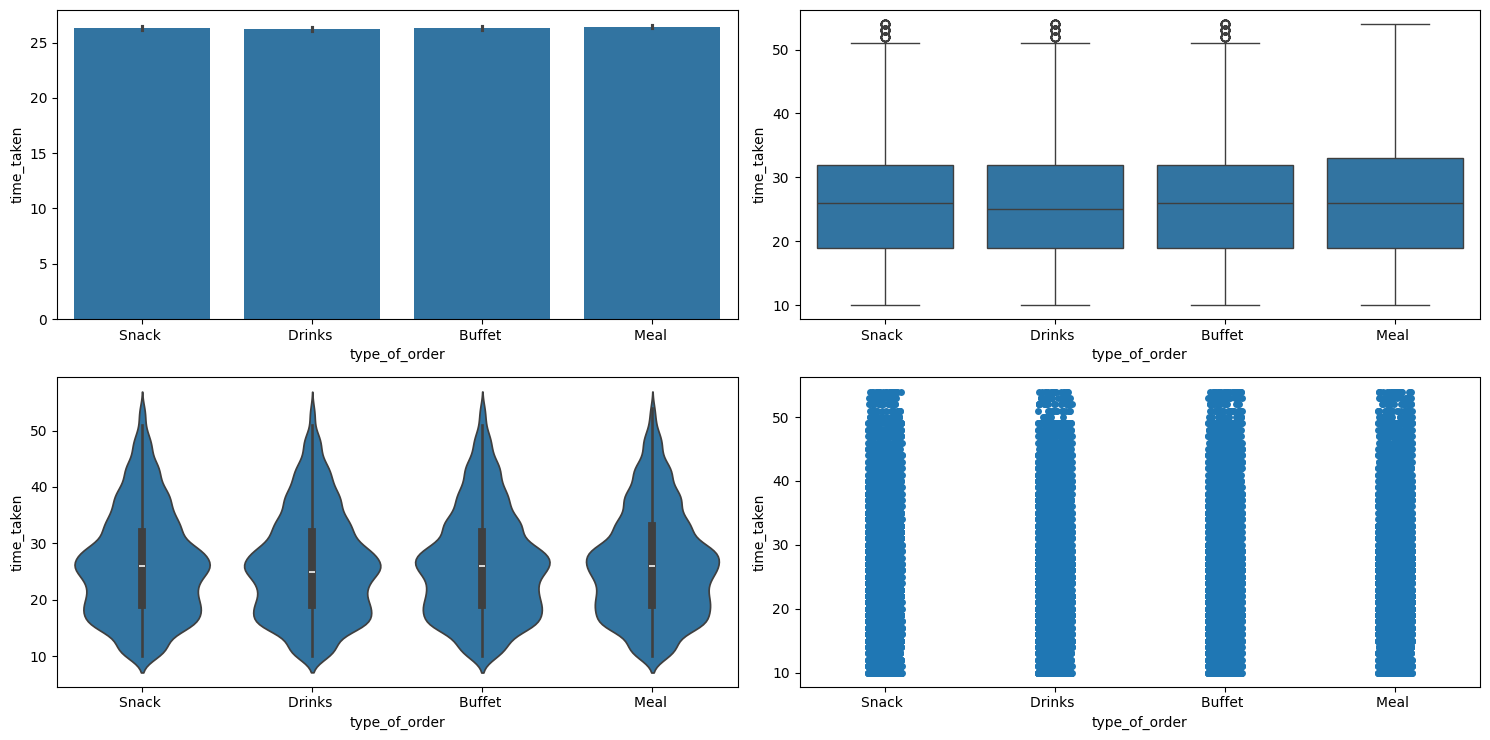

In [ ]:
# does order type have have effect on delivery times

numerical_categorical_analysis(df_final, "type_of_order", "time_taken")

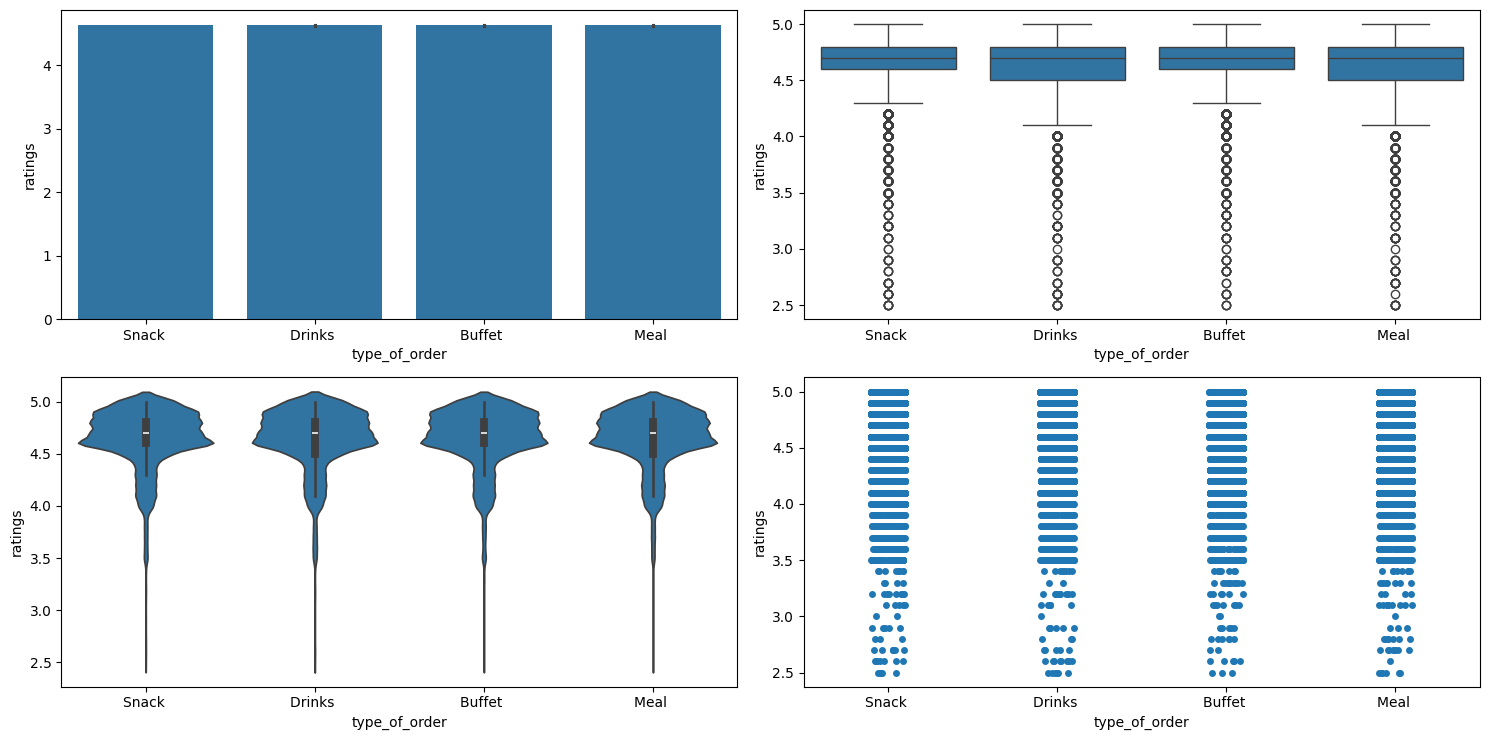

In [ ]:
# does order type has an effect on ratings

numerical_categorical_analysis(df_final, "type_of_order", "ratings")

City Name

,Count,Percentage
city_name,,
JAP,3439,7.56%
RANCHI,3222,7.08%
BANG,3184,7.0%
SUR,3182,6.99%
HYD,3177,6.98%
MUM,3168,6.96%
MYS,3164,6.95%
COIMB,3162,6.95%
VAD,3159,6.94%


**************************************************
The unique categories in city_name column are ['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP']
**************************************************
The number of categories in city_name column are 22


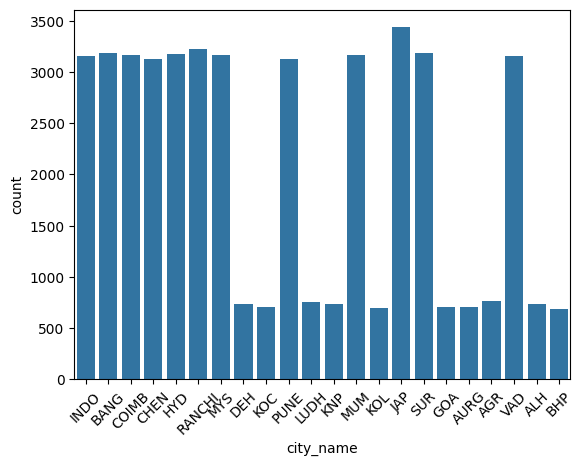

In [ ]:
# categorical analysis on city name

categorical_analysis(df_final, "city_name")

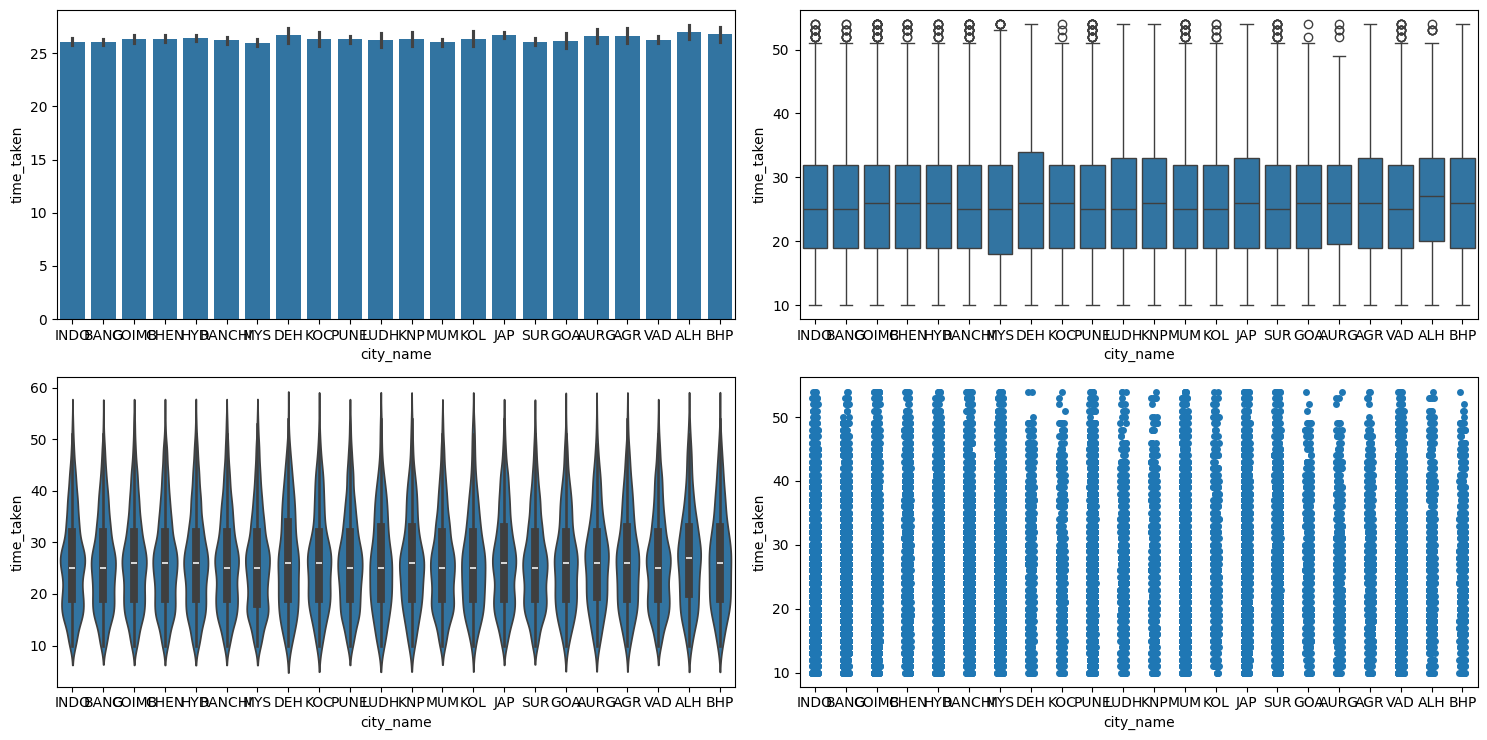

In [ ]:
# does a city affects delivery times

numerical_categorical_analysis(df_final, "city_name", "time_taken")

Distance

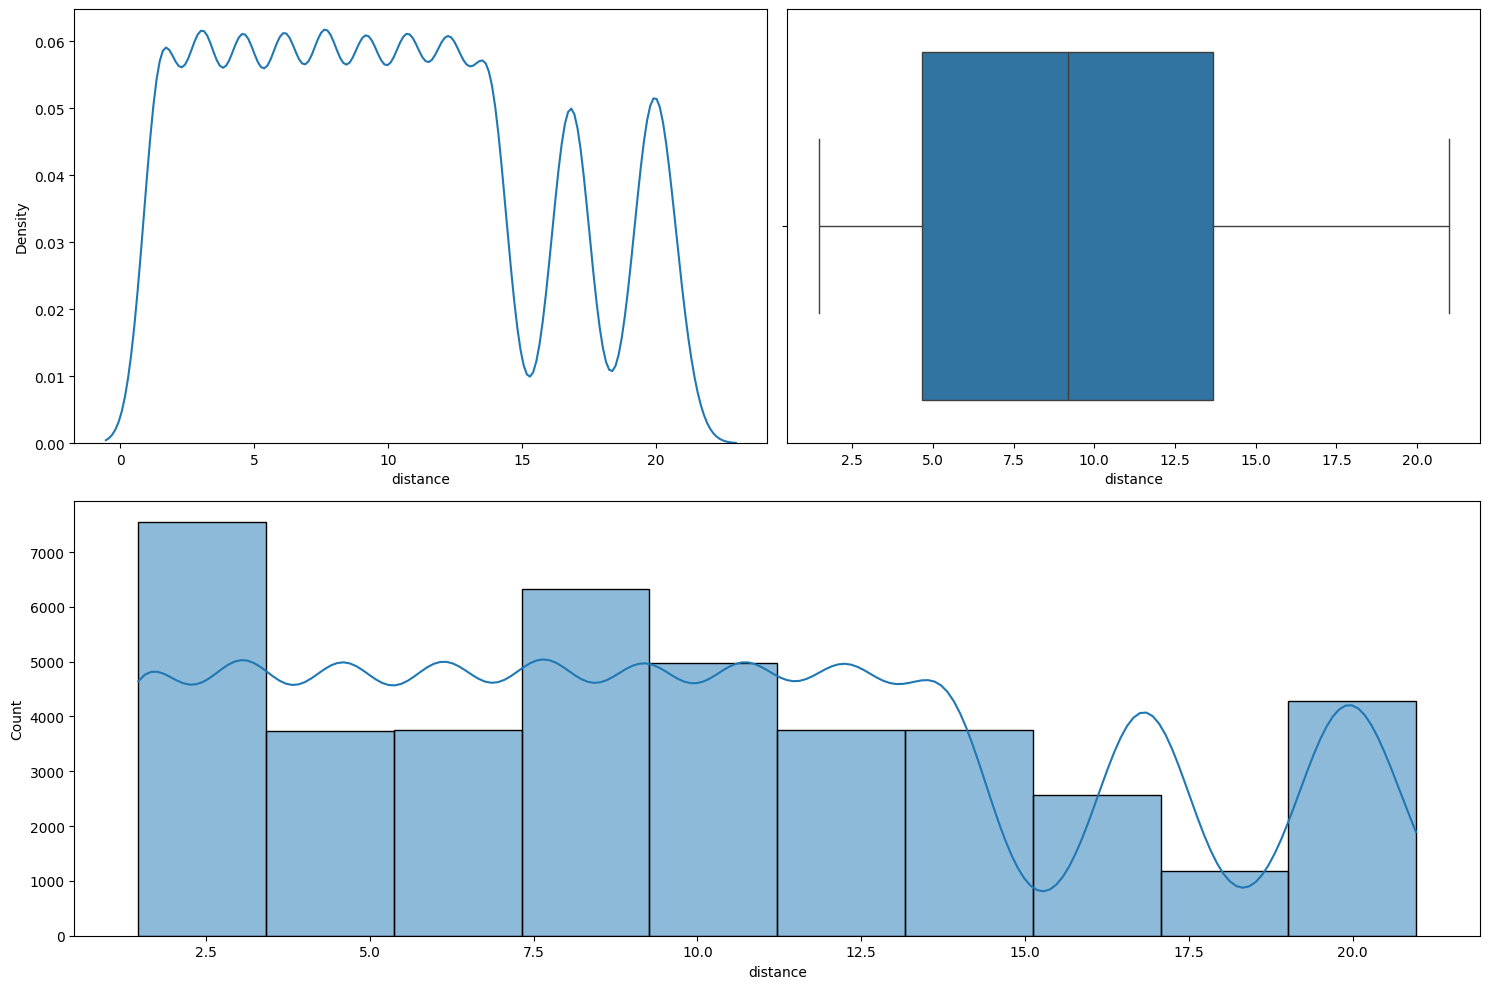

In [ ]:
# numerical analysis of distance

numerical_analysis(df_final, "distance",bins=10)

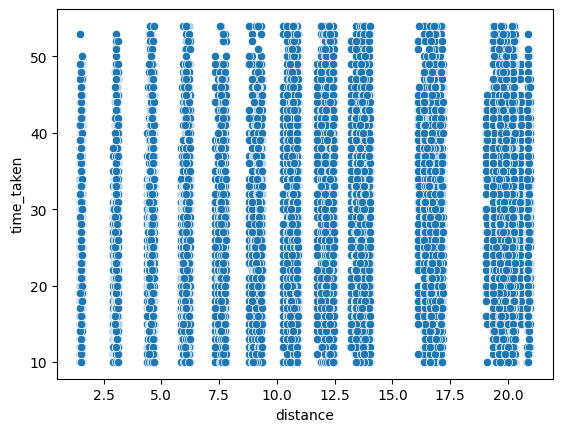

In [ ]:
# relationship between distance and delivery times

sns.scatterplot(df_final,x="distance",y="time_taken")
plt.show()

In [ ]:

# corr

df_final[["distance","time_taken"]].corr()

,distance,time_taken
distance,1.000000,0.320705
time_taken,0.320705,1.000000


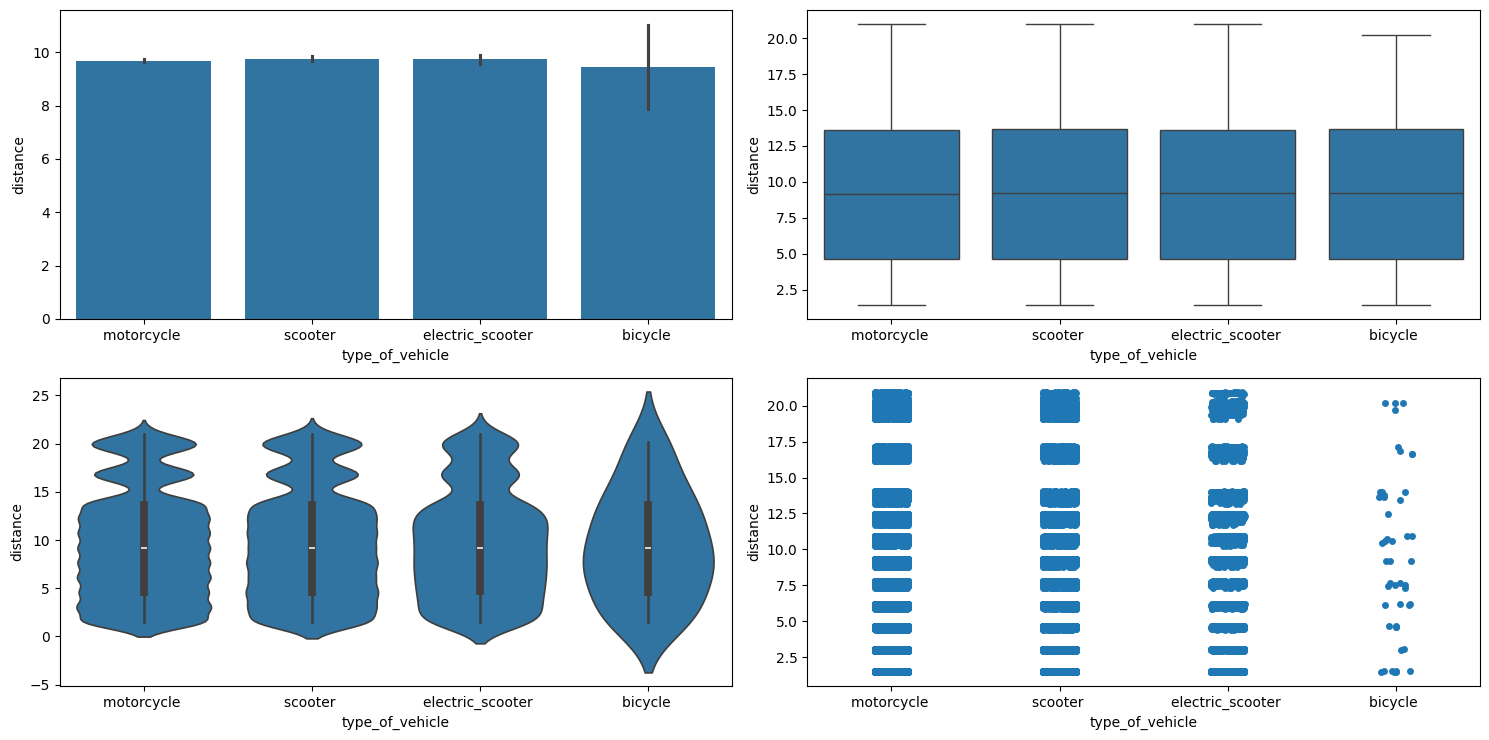

In [ ]:
numerical_categorical_analysis(df_final, "type_of_vehicle", "distance")

In [ ]:
# new feature based on distance

df_final = df_final.assign(
                        distance_type = pd.cut(df_final["distance"],bins=[0,5,10,15,25],
                                               right=False,labels=["short","medium","long","very_long"])
                                    )

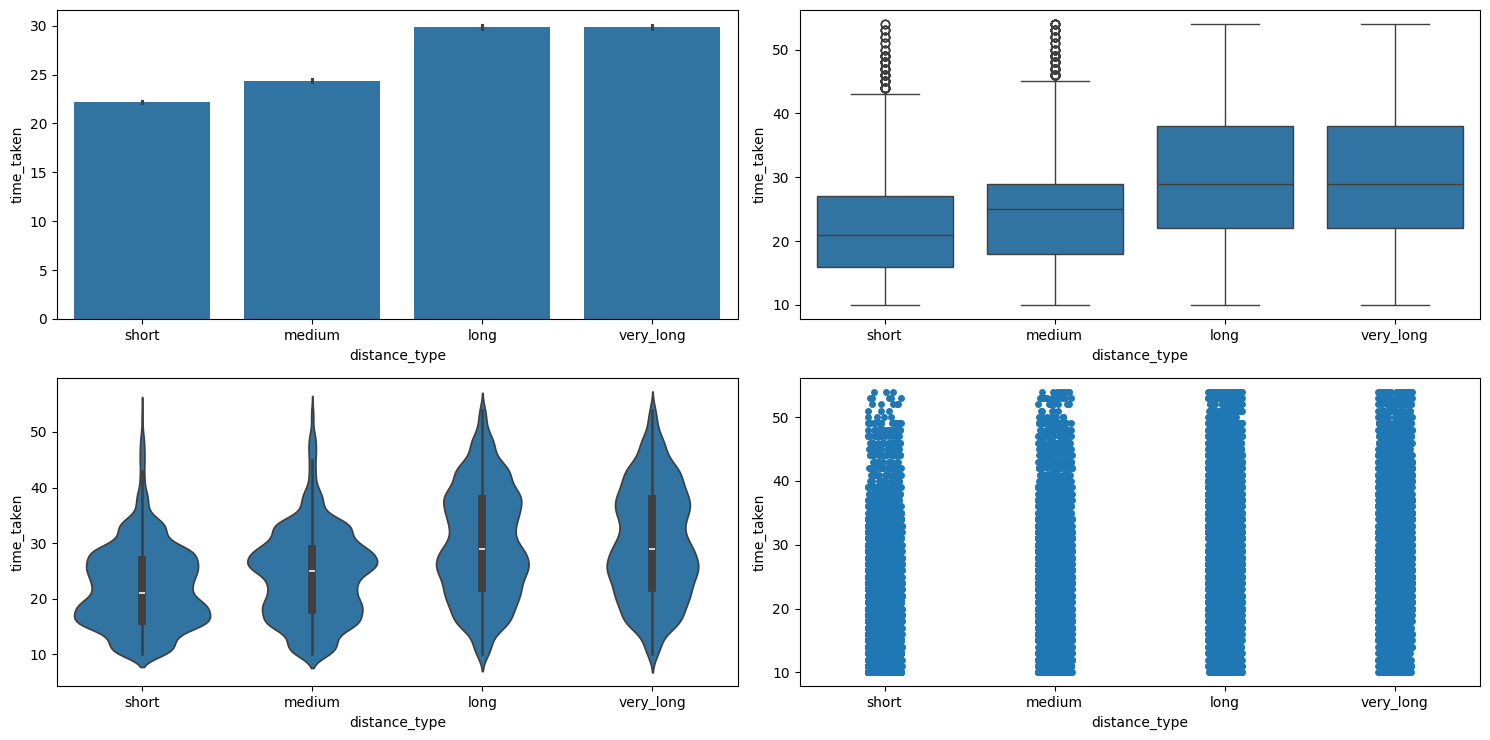

In [ ]:
# does distance type affects delivery times

numerical_categorical_analysis(df_final, "distance_type", "time_taken")